<a href="https://colab.research.google.com/github/mistryamit03/Regression-Analysis-Superstore-Data/blob/main/Collab_Project_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
path = "/content/drive/MyDrive/Datasets/Train.csv"
df = pd.read_csv(path)



In [ ]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


from matplotlib import pyplot as plt
_df_0['Item_Weight'].plot(kind='hist', bins=20, title='Item_Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Item_Visibility'].plot(kind='hist', bins=20, title='Item_Visibility')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Item_MRP'].plot(kind='hist', bins=20, title='Item_MRP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Outlet_Establishment_Year'].plot(kind='hist', bins=20, title='Outlet_Establishment_Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Item_Identifier').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Item_Fat_Content').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Item_Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('Outlet_Identifier').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Item_Weight', y='Item_Visibility', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Item_Visibility', y='Item_MRP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Item_MRP', y='Outlet_Establishment_Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Outlet_Establishment_Year', y='Item_Outlet_Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Item_Weight'].plot(kind='line', figsize=(8, 4), title='Item_Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Item_Visibility'].plot(kind='line', figsize=(8, 4), title='Item_Visibility')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Item_MRP'].plot(kind='line', figsize=(8, 4), title='Item_MRP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Outlet_Establishment_Year'].plot(kind='line', figsize=(8, 4), title='Outlet_Establishment_Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Item_Fat_Content'].value_counts()
    for x_label, grp in _df_16.groupby('Item_Identifier')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Item_Identifier')
_ = plt.ylabel('Item_Fat_Content')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Item_Type'].value_counts()
    for x_label, grp in _df_17.groupby('Item_Fat_Content')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Item_Fat_Content')
_ = plt.ylabel('Item_Type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Outlet_Identifier'].value_counts()
    for x_label, grp in _df_18.groupby('Item_Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Item_Type')
_ = plt.ylabel('Outlet_Identifier')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Outlet_Size'].value_counts()
    for x_label, grp in _df_19.groupby('Outlet_Identifier')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Outlet_Identifier')
_ = plt.ylabel('Outlet_Size')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Item_Identifier'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Item_Weight', y='Item_Identifier', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Item_Fat_Content'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='Item_Weight', y='Item_Fat_Content', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Item_Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='Item_Weight', y='Item_Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['Outlet_Identifier'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='Item_Weight', y='Outlet_Identifier', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

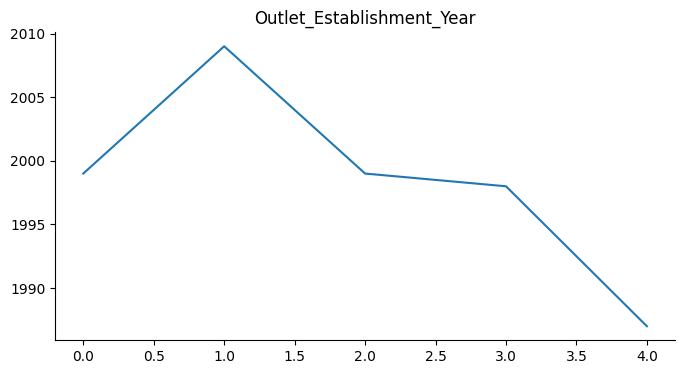

In [ ]:
from matplotlib import pyplot as plt
_df_15['Outlet_Establishment_Year'].plot(kind='line', figsize=(8, 4), title='Outlet_Establishment_Year')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
df.apply(lambda x: len(x.unique()))

,0
Item_Identifier,1559
Item_Weight,416
Item_Fat_Content,5
Item_Visibility,7880
Item_Type,16
Item_MRP,5938
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,4
Outlet_Location_Type,3


In [ ]:
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [ ]:
cat_col = []
for x in df.dtypes.index:
  if df.dtypes[x] == 'object':
    cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
print(cat_col)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [ ]:
median = df['Item_Visibility'].median()
df['Item_Weight'].fillna(median, inplace=True)

In [ ]:
df['Item_Weight'].isnull().sum()

0

In [ ]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
df['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df['Outlet_Size'].isnull().sum()

0

In [ ]:
sum(df['Item_Weight']==0)

0

In [ ]:
df['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [ ]:
df['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [ ]:
df['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0]if not x.mode().empty else 'Unkown'))

In [ ]:
df['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [ ]:
df['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0]if not x.mode().empty else 'Unknown'))

In [ ]:
df['Outlet_Size'].isnull().sum()

0

In [ ]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
median = df['Item_Visibility'].median()
df['Item_Weight'].fillna(median, inplace = True)

In [ ]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
df['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [ ]:
df['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [ ]:
df['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknwown'))

In [ ]:
sum(df['Item_Weight']==0)

0

In [ ]:
sum(df['Item_Identifier']==0)

0

In [ ]:
sum(df['Item_Fat_Content']==0)

0

In [ ]:
sum(df['Item_Visibility']==0)

526

In [ ]:
sum(df['Item_Type']==0)

0

In [ ]:
sum(df['Item_MRP']==0)

0

Tries to find how many zeros are there in each of the attribute columns

In [ ]:
zero_counts = df.apply(lambda x: (x==0).sum())

In [ ]:
print(zero_counts)

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              526
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64


HEre we are replacing the zero values with mean

In [ ]:
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace = True)

In [ ]:
print(zero_counts)

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              526
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64


In [ ]:
sum(df['Item_Visibility']==0)

0

In [ ]:
zero_counts = df.apply(lambda x: (x==0).sum())

In [ ]:
print(zero_counts)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


Replacing the zeros with mean

Colon stands for all the rows

In [ ]:
df.loc[:,'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()],inplace=True)

In [ ]:
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()],inplace= True)

In [ ]:
sum(df['Item_Visibility']==0)

0

Aggregating values in the Fat content

In [ ]:
for col in cat_col:
  print(col)
  print(df[col].value_counts())
  print()

Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018 

Item Fat conent type: Low Fat and Regular. What we are doing here is: Trying to use the other types like LF, reg and similar value like low fat written in small to combine this to its same value.

Combining Item Fat Content. By creating dictionaries in the replace function from python.

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat':'Low Fat' ,'reg': 'Regular'})
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


**CREATING NEW ATTRIBUTES**

Creating new attrtbutes includes that with column: Item Identifier.

FD14
DR15
NCY18

We can extract initials from the data to make one new column with types such as FD= Food, DR= Drinks, NC= Non  Consumable

In [ ]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

,New_Item_Type
0,FD
1,DR
2,FD
3,FD
4,NC
...,...
8518,FD
8519,FD
8520,NC
8521,FD


In [ ]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

,New_Item_Type
0,FD
1,DR
2,FD
3,FD
4,NC
...,...
8518,FD
8519,FD
8520,NC
8521,FD


Changing the abbreviations to full forms

WE can do this either map() or replace() function

In [ ]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD': 'Food', 'NC':'Non-Consumable', 'DR': 'Drinks' })
df['New_Item_Type'].value_counts()

,count
New_Item_Type,
Food,6125
Non-Consumable,1599
Drinks,799


Now we have 3 categories, we can use the non-consumable category in the fat content to represent low fat content or regular as non consumable.

In [ ]:
df.loc[df['New_Item_Type']== 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3918
Regular,3006
Non-Edible,1599
